In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ff1461493de9f0eae0d2c1a5da7bdaf


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

-51.97340551151912 -106.62138116097448
-59.64121742742354 -66.18921573943592
-46.3470540676939 174.97830749734737
51.701598610888965 6.014401359774155
6.131108456142243 -115.46517280746613
78.01383540127296 -47.95878204108823
6.112817667844382 -78.921023068484
83.27438537581196 30.551488790774926
-66.5203805090092 93.93618315559883
-45.71189062903926 70.97407944497411
-40.93570703695997 175.13933154460875
42.0661064875859 43.24464476534271
-89.24733484759719 38.39186558653
79.55478370896495 16.395390744611632
47.57591578808132 8.570275310752663
-16.896019872779476 -126.61289504605575
19.05464041594638 133.36737949273936
-34.6056267369495 -5.957741264659205
-9.915330259333288 106.24449330751418
41.18561134029193 45.246469062309274
-89.12543220079144 68.91888250572305
-74.5536660210565 24.304281001023753
-80.92041386192437 93.041739083972
1.0263618250804285 -96.1078899538216
84.73342836104271 40.4587283700636
23.96222774813775 -107.89257649215273
29.32684282358342 -10.504099154380782
58.

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

castro cl
ushuaia ar
christchurch nz
gennep nl
san patricio mx
ilulissat gl
mutis co
berlevag no
busselton au
souillac mu
te horo nz
kharagauli ge
port elizabeth za
longyearbyen sj
bulach ch
rikitea pf
nishihara jp
jamestown sh
palabuhanratu id
qazax az
taolanaro mg
bredasdorp za
albany au
puerto ayora ec
tumannyy ru
eldorado mx
tiznit ma
markova ru
chuy uy
saskylakh ru
ancud cl
rikitea pf
kaitangata nz
ambilobe mg
ribeira grande pt
castro cl
zhitikara kz
namibe ao
hilo us
busselton au
paamiut gl
vaini to
biak id
saskylakh ru
ushuaia ar
tasiilaq gl
warwick au
khatanga ru
tsogni ga
porto santo pt
askarovo ru
chokurdakh ru
meadow lake ca
busselton au
belushya guba ru
barrow us
oktyabrskiy ru
puerto ayora ec
hami cn
alberdi py
yakeshi cn
taolanaro mg
albany au
taolanaro mg
rikitea pf
tiksi ru
zalantun cn
tautira pf
katsuura jp
rikitea pf
arraial do cabo br
vaini to
hithadhoo mv
upernavik gl
tonstad no
illoqqortoormiut gl
punta arenas cl
east london za
torbay ca
kazachinskoye ru
caohai cn


tuatapere nz
constitucion mx
kazalinsk kz
faanui pf
barentsburg sj
iracoubo gf
hamilton bm
saldanha za
hamilton bm
aksu kz
sao filipe cv
zapolyarnyy ru
sao filipe cv
pittsburg us
pevek ru
upernavik gl
toyooka jp
avarua ck
ushuaia ar
udachnyy ru
ushuaia ar
hobart au
ahipara nz
capreol ca
chumikan ru
tiksi ru
sambava mg
micheweni tz
samalaeulu ws
cape town za
aswan eg
thompson ca
lorengau pg
qaanaaq gl
victoria sc
airai pw
nanortalik gl
andros town bs
lompoc us
castleblayney ie
betioky mg
jamestown sh
coahuayana mx
attawapiskat ca
buraydah sa
hasaki jp
cape town za
atuona pf
illoqqortoormiut gl
hongjiang cn
vanimo pg
verkhnya syrovatka ua
kapaa us
bandarbeyla so
sundarnagar in
barentsburg sj
rikitea pf
noumea nc
ancud cl
rikitea pf
grindavik is
lagoa pt
jacareacanga br
atuona pf
taolanaro mg
pisco pe
fortuna us
yerbogachen ru
nuuk gl
hilo us
bluff nz
jamestown sh
fortuna us
along in
mataura pf
malanje ao
albany au
hermanus za
new norfolk au
tuatapere nz
tikrit iq
vanimo pg
bara sd
carnar

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | christchurch
Processing Record 4 of Set 1 | gennep
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | mutis
Processing Record 8 of Set 1 | berlevag
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | te horo
Processing Record 12 of Set 1 | kharagauli
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | bulach
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | nishihara
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 20 of Set 1 | qazax
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record

Processing Record 37 of Set 4 | cabo san lucas
Processing Record 38 of Set 4 | bow island
Processing Record 39 of Set 4 | grand gaube
Processing Record 40 of Set 4 | nemuro
Processing Record 41 of Set 4 | dingle
Processing Record 42 of Set 4 | port hardy
Processing Record 43 of Set 4 | hobart
Processing Record 44 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 45 of Set 4 | saleaula
City not found. Skipping...
Processing Record 46 of Set 4 | walvis bay
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | karatau
Processing Record 49 of Set 4 | port hedland
Processing Record 50 of Set 4 | pokhara
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | kirakira
Processing Record 3 of Set 5 | maryville
Processing Record 4 of Set 5 | chapais
Processing Record 5 of Set 5 | poum
Processing Record 6 of Set 5 | pilao arcado
City not found. Skipping...
Processing Record 7 of Set 5 | kwinana
Processing Record 8 of Set 5 | presque isle
Pro

Processing Record 30 of Set 8 | ourem
Processing Record 31 of Set 8 | ketchikan
Processing Record 32 of Set 8 | mporokoso
Processing Record 33 of Set 8 | el balyana
City not found. Skipping...
Processing Record 34 of Set 8 | kavaratti
Processing Record 35 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 36 of Set 8 | shizunai
Processing Record 37 of Set 8 | karatuzskoye
Processing Record 38 of Set 8 | ahumada
City not found. Skipping...
Processing Record 39 of Set 8 | severo-kurilsk
Processing Record 40 of Set 8 | poya
Processing Record 41 of Set 8 | baloda bazar
Processing Record 42 of Set 8 | north bend
Processing Record 43 of Set 8 | songea
Processing Record 44 of Set 8 | mutsu
Processing Record 45 of Set 8 | glossop
Processing Record 46 of Set 8 | pringsewu
Processing Record 47 of Set 8 | port keats
Processing Record 48 of Set 8 | kudal
Processing Record 49 of Set 8 | valle hermoso
Processing Record 50 of Set 8 | kamaishi
Processing Record 1 of Set 9 | hulyaypole

Processing Record 17 of Set 12 | sabang
Processing Record 18 of Set 12 | tucumcari
Processing Record 19 of Set 12 | savonlinna
Processing Record 20 of Set 12 | college
Processing Record 21 of Set 12 | samfya
Processing Record 22 of Set 12 | nizhniy odes
Processing Record 23 of Set 12 | lexington
Processing Record 24 of Set 12 | portobelo
Processing Record 25 of Set 12 | synya
Processing Record 26 of Set 12 | whitehorse
Processing Record 27 of Set 12 | waitati
Processing Record 28 of Set 12 | soyo
Processing Record 29 of Set 12 | issia
Processing Record 30 of Set 12 | hammerfest
Processing Record 31 of Set 12 | ilo
Processing Record 32 of Set 12 | upington
Processing Record 33 of Set 12 | arkhara
Processing Record 34 of Set 12 | wukari
Processing Record 35 of Set 12 | barreirinha
Processing Record 36 of Set 12 | natal
Processing Record 37 of Set 12 | ugoofaaru
Processing Record 38 of Set 12 | araouane
Processing Record 39 of Set 12 | ghorawal
Processing Record 40 of Set 12 | the pas
Pro

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,63.09,87,58,4.43,BR,2022-10-01 20:33:59
1,Ushuaia,-54.8000,-68.3000,46.06,53,20,28.77,AR,2022-10-01 20:34:00
2,Christchurch,-43.5333,172.6333,52.41,89,20,3.44,NZ,2022-10-01 20:34:00
3,Gennep,51.6983,5.9736,56.08,85,0,8.05,NL,2022-10-01 20:34:00
4,San Patricio,28.0170,-97.5169,89.17,27,0,10.20,US,2022-10-01 20:34:01
5,Ilulissat,69.2167,-51.1000,33.82,64,91,0.00,GL,2022-10-01 20:34:01
6,Mutis,6.2262,-77.4044,78.37,84,100,6.80,CO,2022-10-01 20:34:02
7,Berlevag,70.8578,29.0864,39.20,87,100,2.30,NO,2022-10-01 20:34:02
8,Busselton,-33.6500,115.3333,54.19,84,78,15.77,AU,2022-10-01 20:34:03
9,Souillac,-20.5167,57.5167,71.98,68,75,10.36,MU,2022-10-01 20:34:03


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

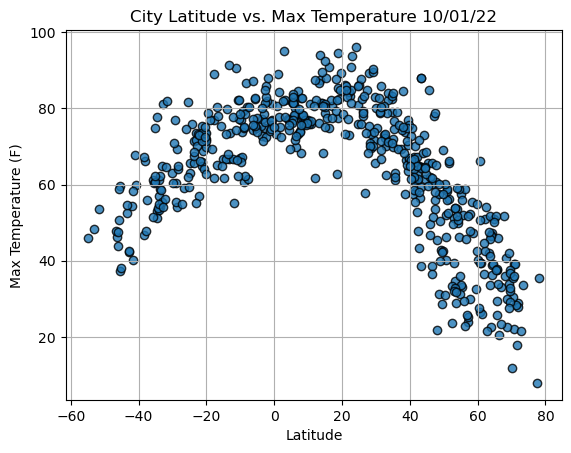

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

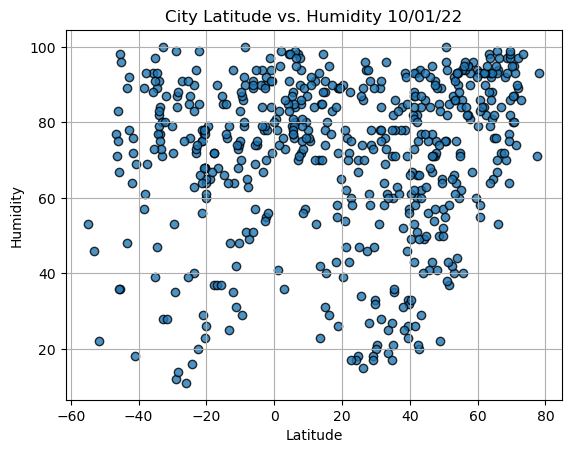

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

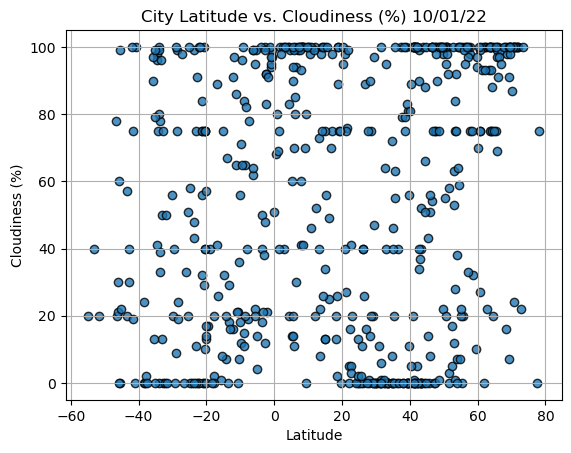

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

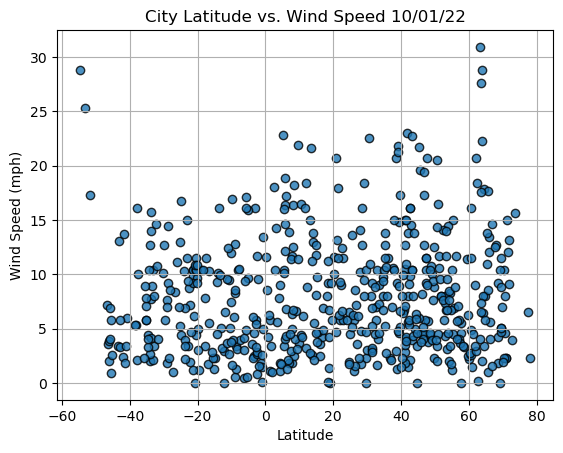

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()